# Rain Fall Prediction

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data set description

In [4]:
df.shape

print('There are 1.45L rows and 23 columns in the dataset.')

There are 1.45L rows and 23 columns in the dataset.


In [5]:
# Check for categorical and numerical variables
df.info()

# Both categorical and continuous are there.
# Also presence of null values are observed in non-null count column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

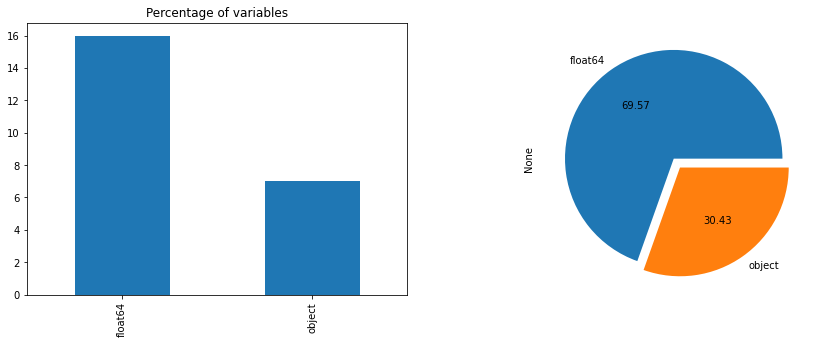

In [6]:
# Percetage of categorical and numerical columns in the dataset
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Percentage of variables', loc='center')
df.dtypes.value_counts().plot(kind='bar')

ax2 = plt.subplot(1,2,2)
df.dtypes.value_counts().plot(kind='pie', autopct='%0.2f', ax=ax2, explode=[0,0.1])
plt.show()



Around 70% of numerical and 30% of categoricals are observed in the dataset.

In [7]:
print('Categorical columns are :\n', cat_cols)
print()
print('Numerical columns are :\n', num_cols)

Categorical columns are :
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical columns are :
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
# Converting Date variable into year, month and day columns
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [9]:
# Five point summary for numrerical variables
df.describe().T

# This shows the min, max, mean values, values at different quantiles, total number of non-null observations and 
# standard deviation for each variable.

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [10]:
# Five point summary for categorical variables
df.describe(include='object').T

# This shows the total number of non-null observations, count of unique values, mode of values and its name.

,count,unique,top,freq
Date,145460,3436,2014-01-19,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


# Univariant analysis

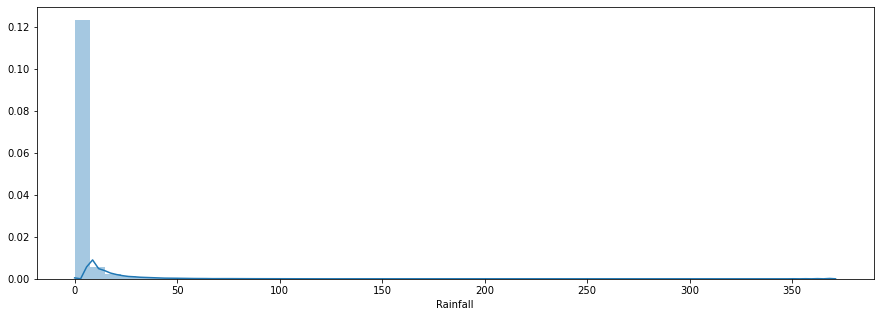

In [11]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['Rainfall'])
plt.show()

* Rainfall is right skewed and not normally distributed.
* Inmost of the days rainfall observed to be zero.

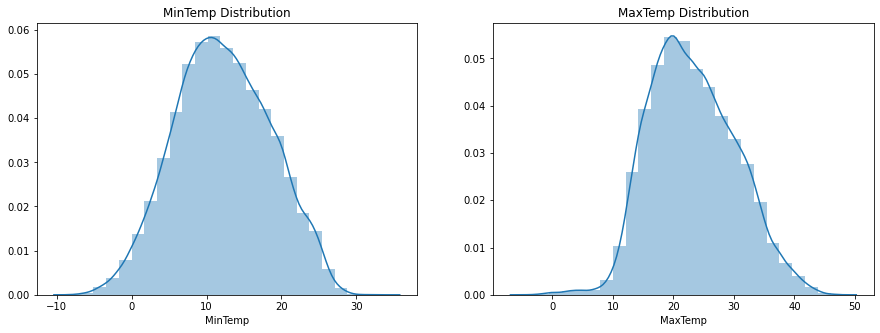

In [12]:
# Distribution of Temperature
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('MinTemp Distribution')
sns.distplot(df['MinTemp'], ax=ax1, bins=25)

ax2 = plt.subplot(1, 2, 2)
plt.title('MaxTemp Distribution')
sns.distplot(df['MaxTemp'], ax=ax2, bins=25)
plt.show()

* Both mintemp and maxtemp are almost normally distributed.
* In most of the days, minimum temperature is observed between 8-12degree and maximum temperature between 18-22degree.

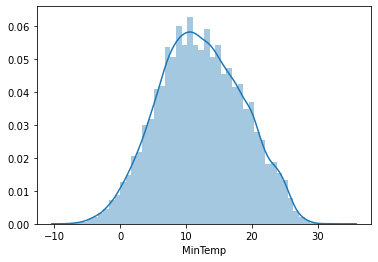

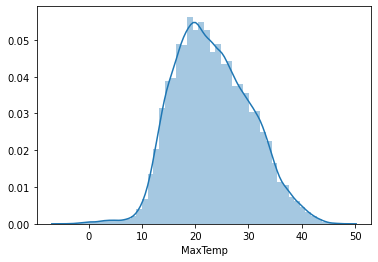

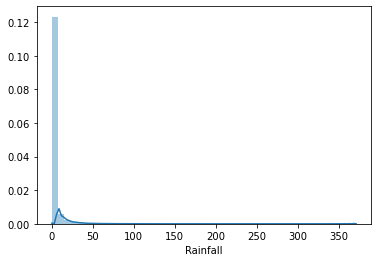

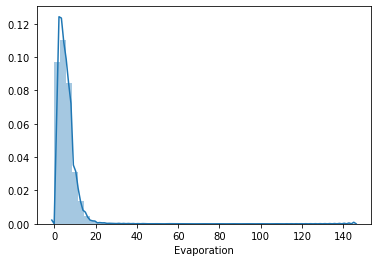

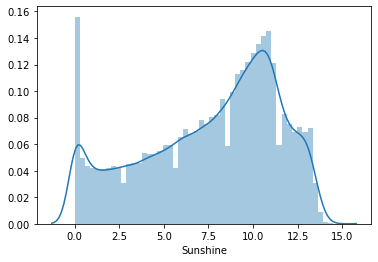

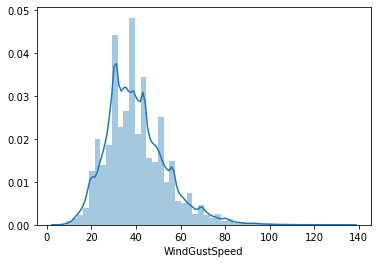

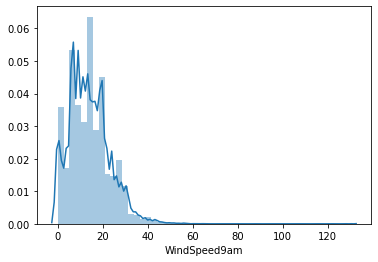

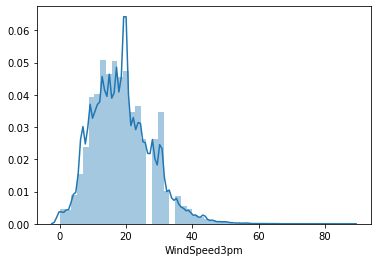

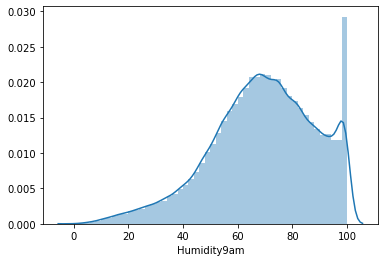

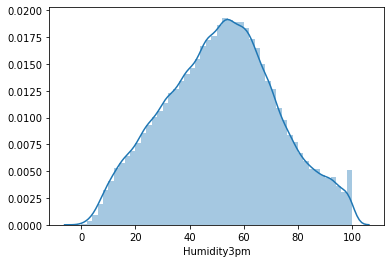

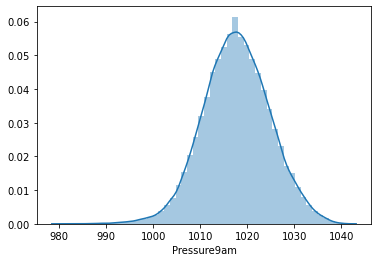

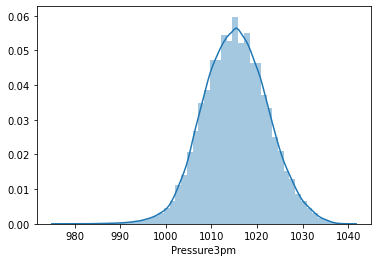

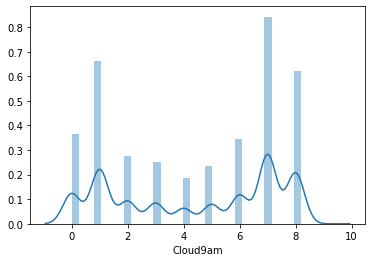

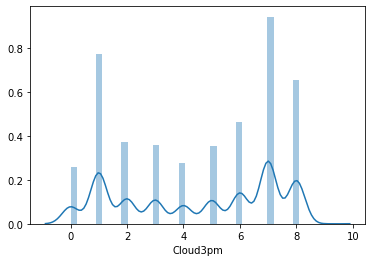

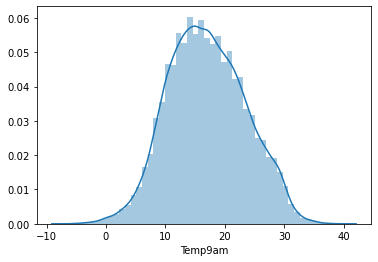

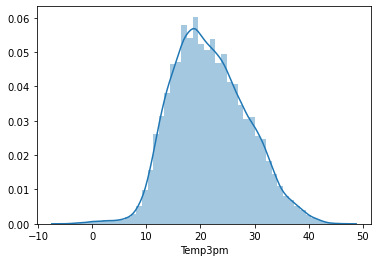

In [13]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

* Mintemp, Maxtemp, pressure3pm, pressure9am, Temp9am, Temp3am variablesa are almost normally distributed.
* Other variables do not follows Gausian distribution in the data.

In [14]:
# Unique locations and its name
print('Unique number of locations are :', len(df['Location'].unique()))
df['Location'].unique()

Unique number of locations are : 49


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

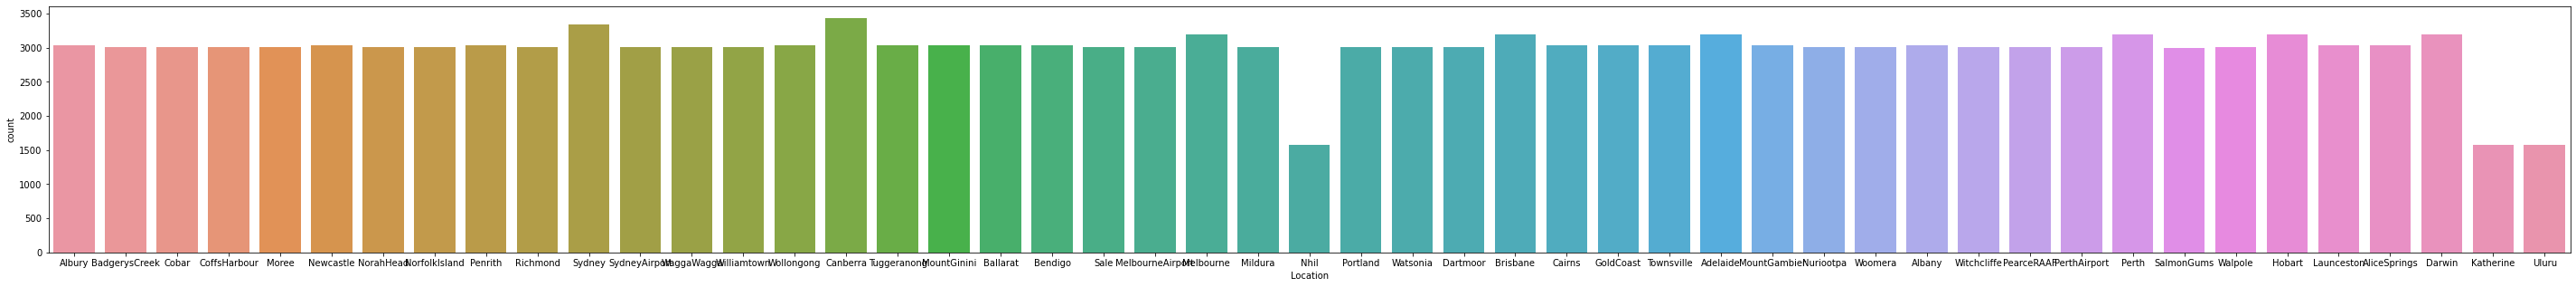

In [15]:
# Number of observations for each location
plt.figure(figsize=(50,5))
sns.countplot(df['Location'])
plt.show()

* The number of observations for each location is almost same except Nihil, Katherine and Uluru locations.

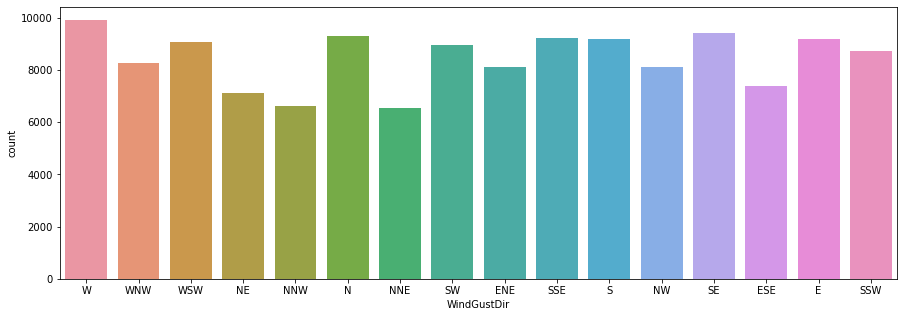

In [16]:
# Count plot for WindGustDir
plt.figure(figsize=(15,5))
sns.countplot(df['WindGustDir'])
plt.show()

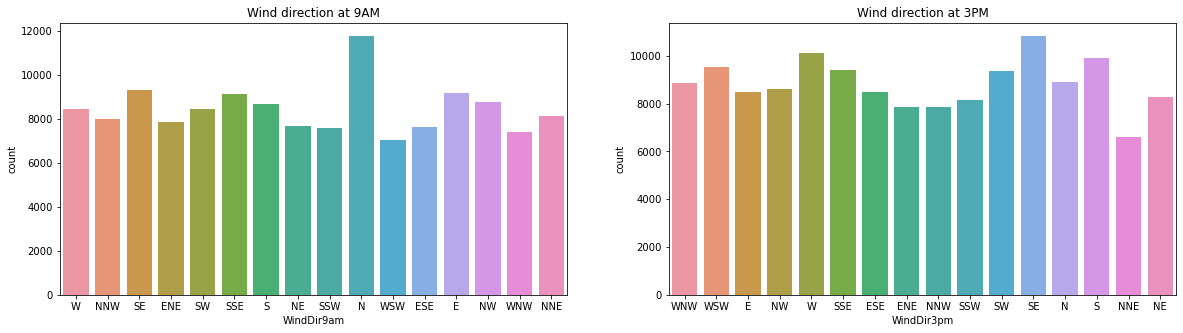

In [17]:
# Wind direction at different timespan
fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax1 = plt.subplot(1, 2, 1)
plt.title('Wind direction at 9AM')
sns.countplot(df['WindDir9am'], ax=ax1)

ax2 = plt.subplot(1, 2, 2)
plt.title('Wind direction at 3PM')
sns.countplot(df['WindDir3pm'], ax=ax2)
plt.show()

* At 9AM, direction of wind is more observed in North direction.
* At 3PM, direction of wind is more observed in North-East direction.

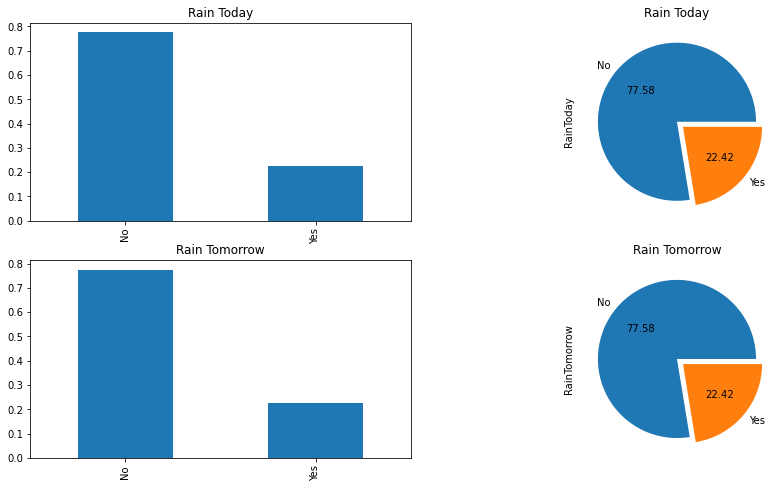

In [18]:
# Check for data imbalance
fig, ax = plt.subplots(2, 2, figsize=(15,8))

ax1 = plt.subplot(2, 2, 1)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='bar', ax=ax1)

ax2 = plt.subplot(2, 2, 2)
plt.title('Rain Today')
df['RainToday'].value_counts(normalize=True).plot(kind='pie', ax=ax2, autopct='%0.2f', explode=[0,0.1])

ax3 = plt.subplot(2, 2, 3)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='bar', ax=ax3)

ax4 = plt.subplot(2, 2, 4)
plt.title('Rain Tomorrow')
df['RainTomorrow'].value_counts(normalize=True).plot(kind='pie', ax=ax4, autopct='%0.2f', explode=[0,0.1])
plt.show()

* Both variables shows data imbalance.
* Also chances of happening rain percentage is same for both today and tomorrow.

# Bivariant and Multivariant analysis

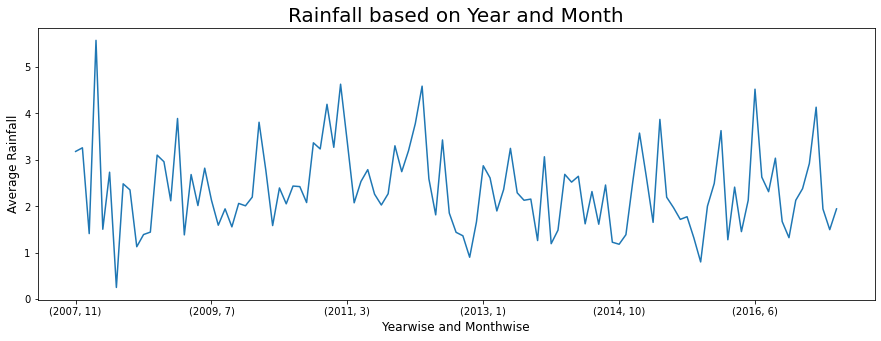

In [19]:
# Average rainfall based on year and month
plt.figure(figsize=(15,5))
df.groupby(by=['Year', 'Month'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Year and Month', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Yearwise and Monthwise', fontsize=12)
plt.show()

In [20]:
# Average rainfall data
df.groupby(by=['Year', 'Month'])[['Rainfall']].mean().T

Year      2007                2008                                          \
Month       11        12        1         2         3         4         5    
Rainfall  3.18  3.258065  1.412903  5.568966  1.506452  2.733333  0.254839   

Year                                    ...      2016                      \
Month           6         7         8   ...        9         10        11   
Rainfall  2.483333  2.352893  1.130579  ...  3.035131  1.672697  1.325279   

Year                   2017                                                    
Month          12        1         2         3         4         5         6   
Rainfall  2.12964  2.379396  2.920089  4.131174  1.943271  1.497472  1.944638  

[1 rows x 113 columns]

* Rainfall data is available for 10years
* Both maximum and minimum average rainfall is observed in 2008 for the months of Feb and April.

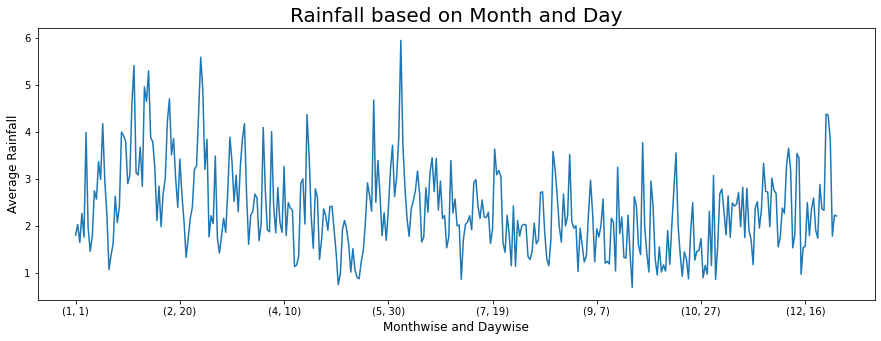

In [21]:
# Average rainfall based on month and day
plt.figure(figsize=(15,5))
df.groupby(by=['Month', 'Day'])['Rainfall'].mean().plot()
plt.title('Rainfall based on Month and Day', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=12)
plt.xlabel('Monthwise and Daywise', fontsize=12)
plt.show()

In [22]:
# AVerage rainfall monthwise for all the years
df.groupby(by=['Month', 'Day'])[['Rainfall']].mean().T

Month           1                                                              \
Day             1         2         3        4         5         6         7    
Rainfall  1.809246  2.035904  1.652969  2.26969  1.763484  3.988544  1.966346   

Month                                   ...     12                      \
Day             8         9         10  ...     22        23        24   
Rainfall  1.465693  1.786131  2.750952  ...  1.742  2.884857  2.366282   

Month                                                                           
Day             25        26        27        28        29        30        31  
Rainfall  2.334593  4.379592  4.356897  3.823699  1.786705  2.231884  2.215385  

[1 rows x 366 columns]

* Maximum rainfall is observed in month of June.
* Minimum rainfall is observed in month of September.

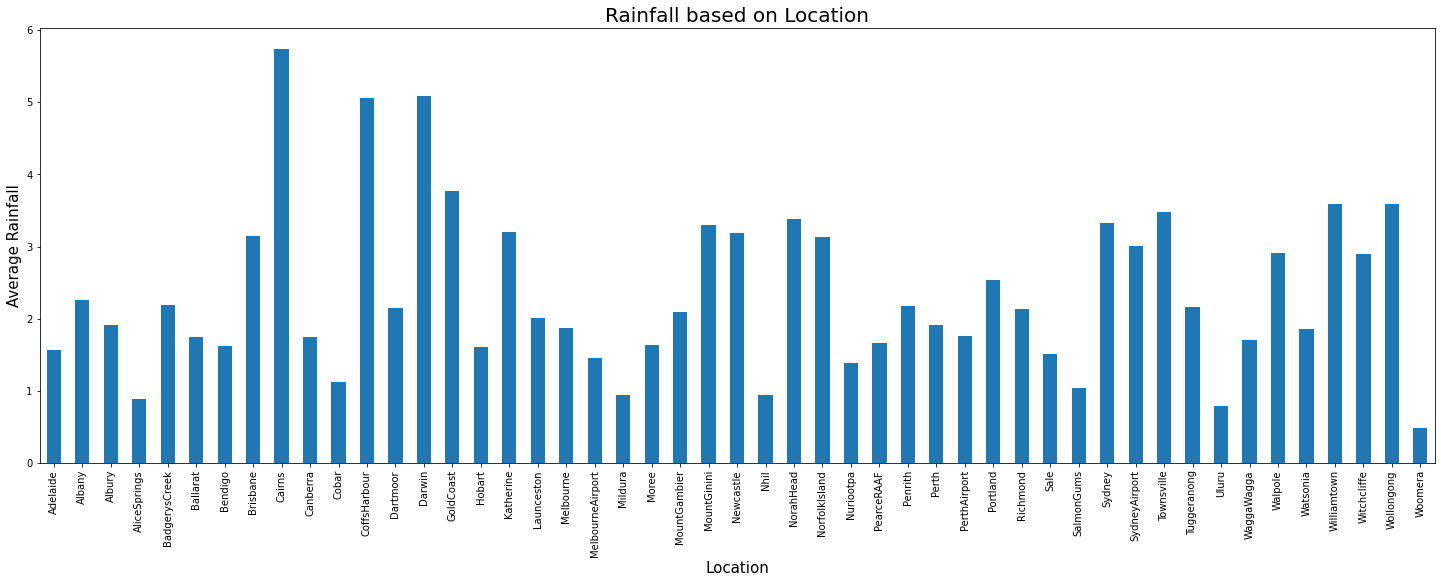

In [23]:
# Average rainfall based on location
plt.figure(figsize=(25,8))
df.groupby(by=['Location'])['Rainfall'].mean().plot(kind='bar')
plt.title('Rainfall based on Location', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=15)
plt.xlabel('Location', fontsize=15)
plt.show()

* Location Cairns have maximum rainfall.
* Location Woomera have minimum rainfall.

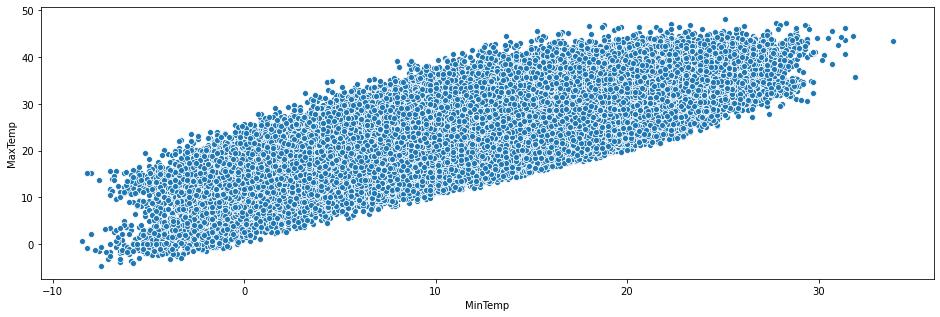

In [24]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp')
plt.show()

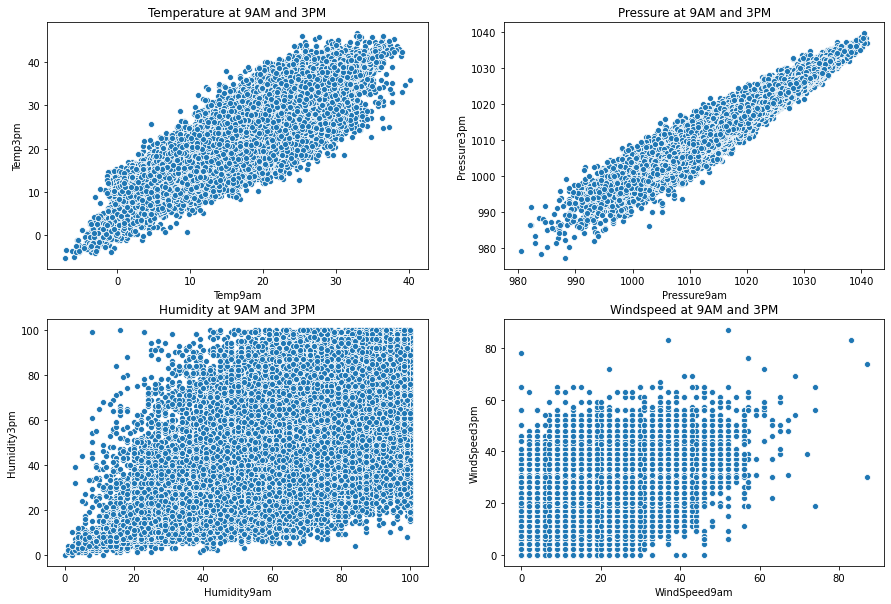

In [25]:
# Relationship between variables
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Temperature at 9AM and 3PM')
sns.scatterplot(data=df, x='Temp9am', y='Temp3pm')

ax2 = plt.subplot(2, 2, 2)
plt.title('Pressure at 9AM and 3PM')
sns.scatterplot(data=df, x='Pressure9am', y='Pressure3pm')

ax3 = plt.subplot(2, 2, 3)
plt.title('Humidity at 9AM and 3PM')
sns.scatterplot(data=df, x='Humidity9am', y='Humidity3pm')

ax4 = plt.subplot(2, 2, 4)
plt.title('Windspeed at 9AM and 3PM')
sns.scatterplot(data=df, x='WindSpeed9am', y='WindSpeed3pm')
plt.show()

* Both Temperature and Pressure shows linear relationship at different timespan.
* For Humidity and Windspeed, scatter plot not showing linear relationship at different timespan.

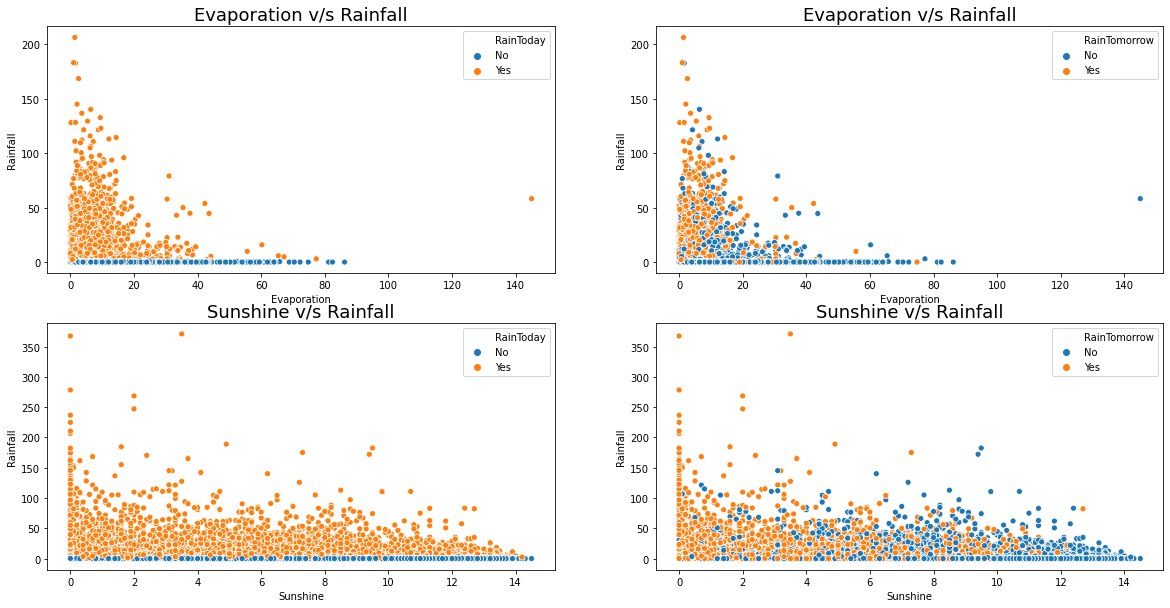

In [26]:
# Wind direction at different timespan
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax1, hue='RainToday')

ax2 = plt.subplot(2, 2, 2)
plt.title('Evaporation v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Evaporation', y='Rainfall', ax=ax2, hue='RainTomorrow')

ax3 = plt.subplot(2, 2, 3)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax3, hue='RainToday')

ax4 = plt.subplot(2, 2, 4)
plt.title('Sunshine v/s Rainfall', fontsize=18)
sns.scatterplot(data=df, x='Sunshine', y='Rainfall', ax=ax4, hue='RainTomorrow')
plt.show()

* As Evaporation increases, chances of rainfall happening is very less.
* As Sunshine increases, chances of rainfall is there but rainfall rate is less.

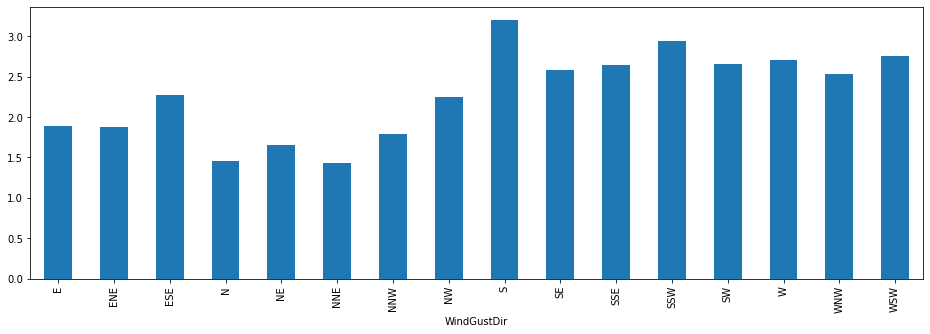

In [27]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df.groupby(by=['WindGustDir'])['Rainfall'].mean().plot(kind='bar')
plt.show()

* In south direction, rainfall is more.

* Few variables are normally distributed and shows linear relationship with other variables.


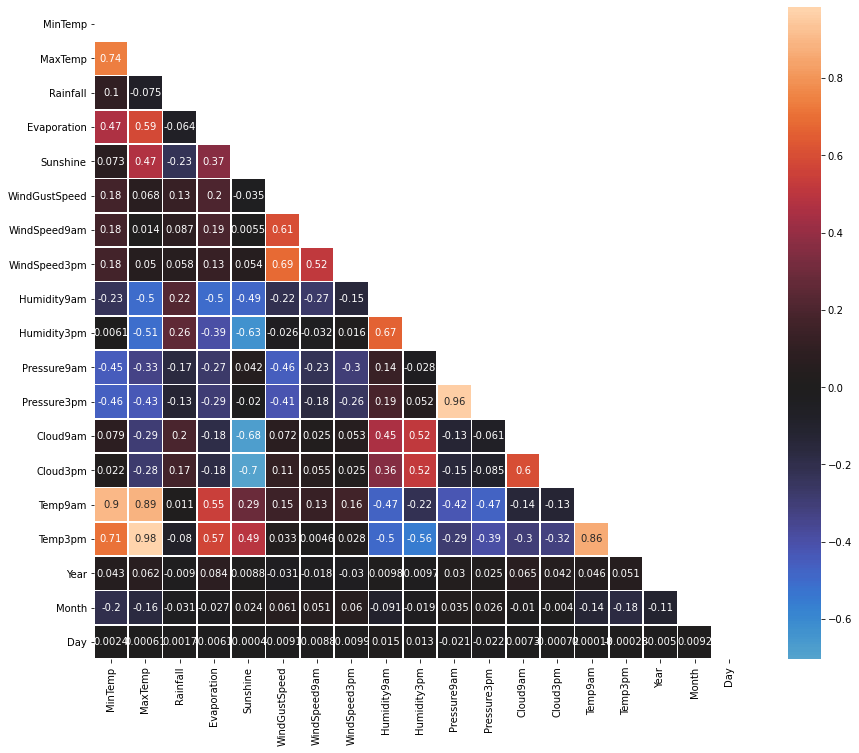

In [28]:
# correlation plot
plt.figure(figsize=(15,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, center=0, square=True, annot=True, linewidth=0.5)
plt.show()

Few pairs of variables shows strong correlation between them,

    * MinTemp and MaxTemp (r=0.74)
    * WindSpeed3pm and WindGustSpeed (r=0.69)
    * Temp9am and MinTemp (r=0.90)
    * Pressure3pm and Pressure9am (r=0.96)
    * Temp9am and MaxTemp (r=0.89)
    * Temp3pm and MinTemp (r=0.71)
    * Temp3pm and MaxTemp (r=0.98)

Above these variables shows multicollinearity each other.

In [29]:
# Variables not correlating with rainfall
df_corr = df.corr()[(df.corr() < 0.1) & (df.corr() > -0.1)][['Rainfall']]
df_corr.dropna(inplace=True)
df_corr.T

# These variables can be removed because not supporting rainfall.

,MaxTemp,Evaporation,WindSpeed9am,WindSpeed3pm,Temp9am,Temp3pm,Year,Month,Day
Rainfall,-0.074992,-0.064351,0.087338,0.057887,0.011192,-0.079657,-0.008956,-0.031371,0.001712


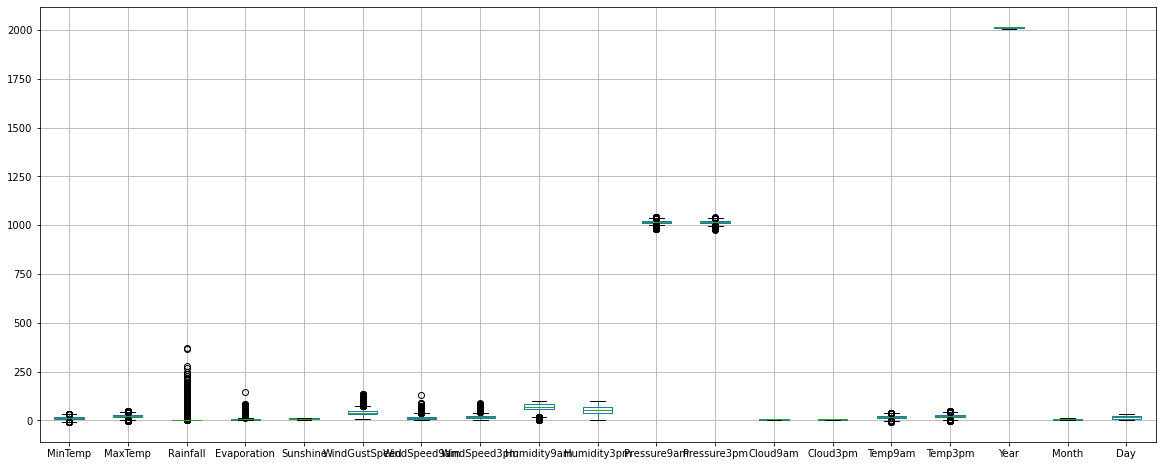

In [30]:
# Check for presence of outliers
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

Variable name : MinTemp


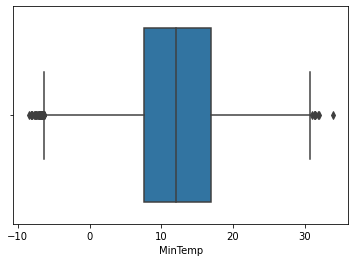

Variable name : MaxTemp


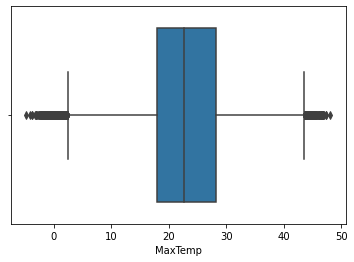

Variable name : Rainfall


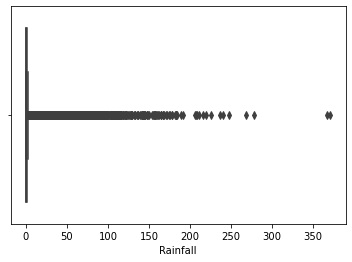

Variable name : Evaporation


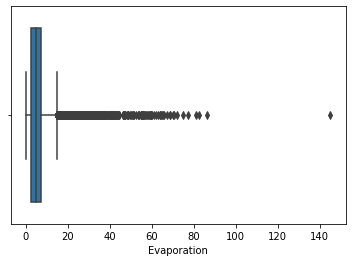

Variable name : Sunshine


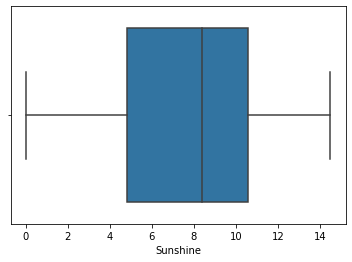

Variable name : WindGustSpeed


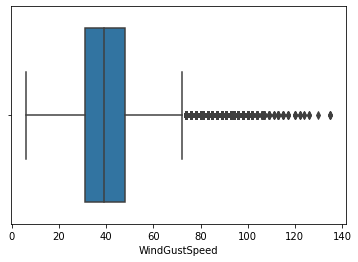

Variable name : WindSpeed9am


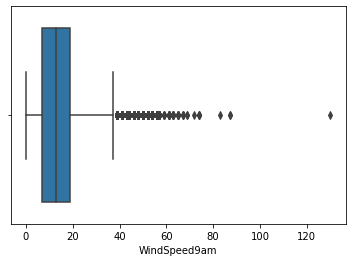

Variable name : WindSpeed3pm


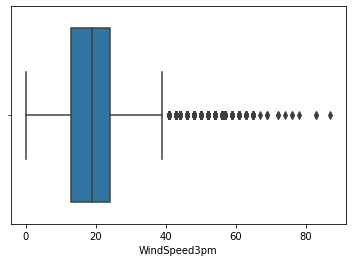

Variable name : Humidity9am


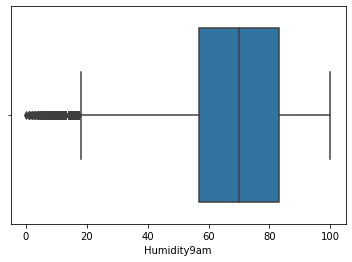

Variable name : Humidity3pm


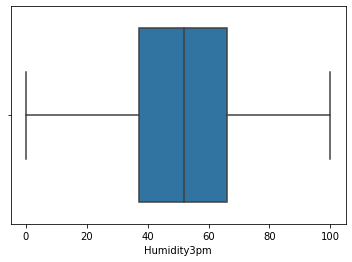

Variable name : Pressure9am


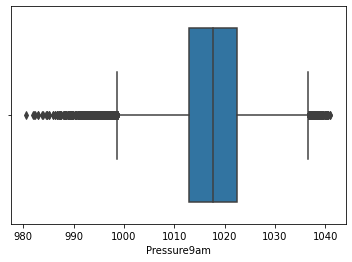

Variable name : Pressure3pm


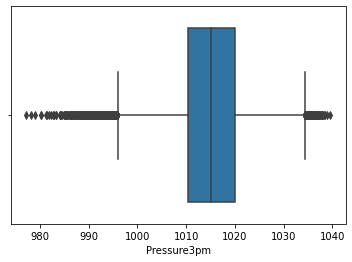

Variable name : Cloud9am


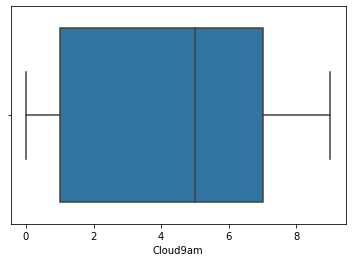

Variable name : Cloud3pm


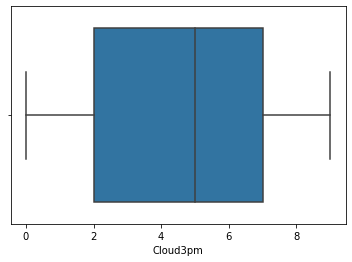

Variable name : Temp9am


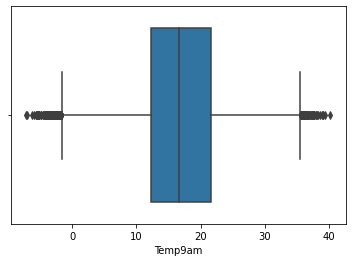

Variable name : Temp3pm


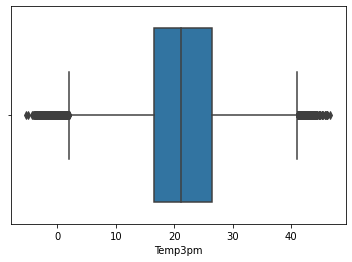

In [31]:
# Check for outliers using box plot for all numerical variable
for col in num_cols:
    print('Variable name :', col)
    sns.boxplot(df[col])
    plt.show()

* Presence of outliers seen in all continuous variables except Sunshine, Humidity3pm, Cloud9am and Cloud3pm.
* These outliers are transformed using Powertransformer instead of removing it.

# Transformation of data

In [32]:
# Remove Date column, because it is converted into date, month and year columns
# Converting Date variable into year, month and day columns

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [33]:
# Removing Date column
df.drop('Date', axis=1, inplace=True)

In [34]:
# Convert categorical column into numrical (RainToday, RainTomorrow)
df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

In [35]:
# Convert location column into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Location'] = le.fit_transform(df['Location']).astype('int32')
df['WindGustDir'] = le.fit_transform(df['WindGustDir']).astype('int32')
df['WindDir9am'] = le.fit_transform(df['WindDir9am']).astype('int32')
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm']).astype('int32')

* All the variables are converted into continuous data form.
* Before transforming data, remove all ordinal or label encoded data. Because powertransformer won't have effect on it.

In [36]:
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year',
       'Month', 'Day']

In [37]:
df1 = df.copy(deep=True)

In [38]:
df1.drop(columns=cols, inplace=True, axis=1)

In [39]:
# Transform the dataset df1 using Powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [40]:
# Add ordinal columns to trasformed dataset
df1_pt_ = pd.concat([df1_pt, df[cols]], axis=1)
df1_pt_.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,0.202047,-0.014924,0.720430,NaN,NaN,0.411254,0.732851,0.660740,0.044886,-1.442451,...,0.044818,2,13,13,14,0.0,0.0,2008,12,1
1,-0.735221,0.290361,-0.677825,NaN,NaN,0.411254,-1.184328,0.454282,-1.306010,-1.285844,...,0.399401,2,14,6,15,0.0,0.0,2008,12,2
2,0.124920,0.372724,-0.677825,NaN,NaN,0.547369,0.638300,0.860721,-1.562048,-1.029549,...,0.244185,2,15,13,15,0.0,0.0,2008,12,3


Variable name : MinTemp


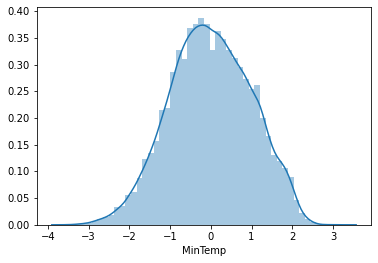

Variable name : MaxTemp


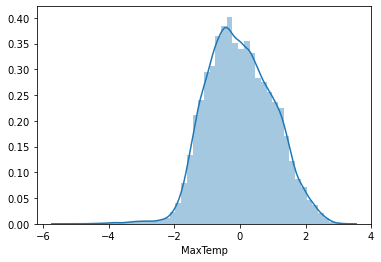

Variable name : Rainfall


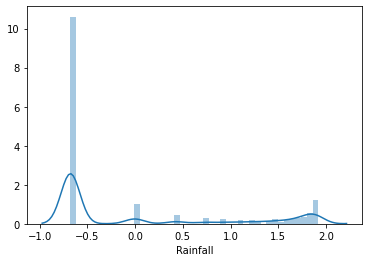

Variable name : Evaporation


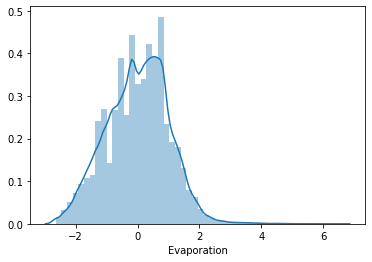

Variable name : Sunshine


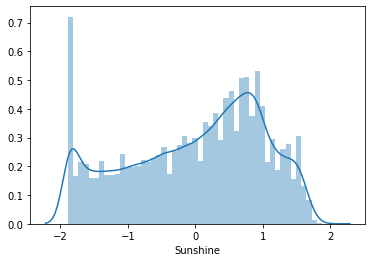

Variable name : WindGustSpeed


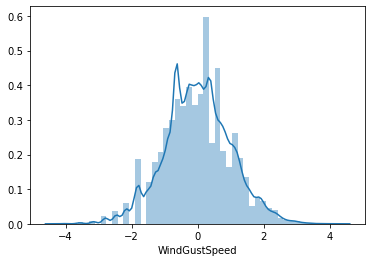

Variable name : WindSpeed9am


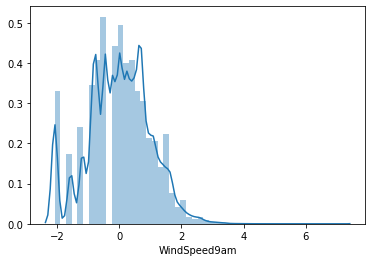

Variable name : WindSpeed3pm


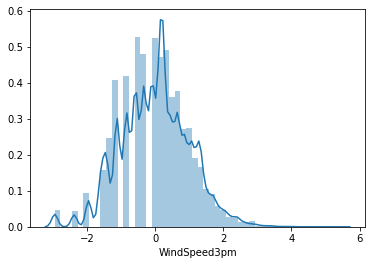

Variable name : Humidity9am


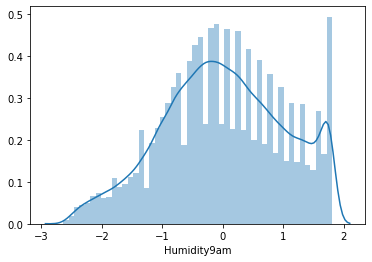

Variable name : Humidity3pm


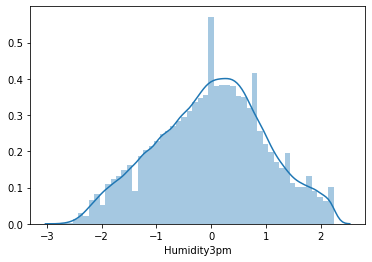

Variable name : Pressure9am


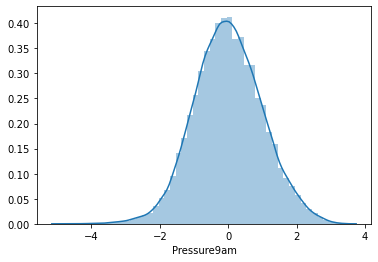

Variable name : Pressure3pm


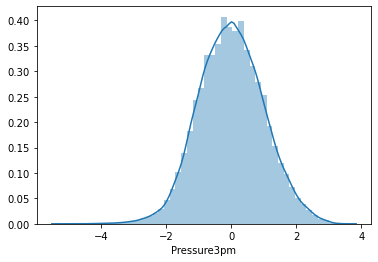

Variable name : Cloud9am


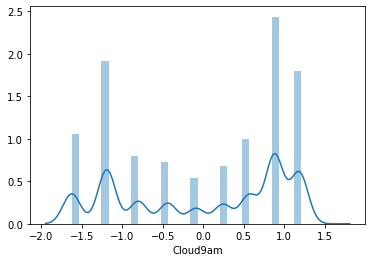

Variable name : Cloud3pm


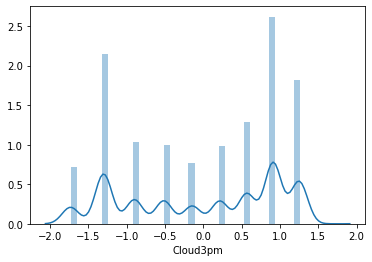

Variable name : Temp9am


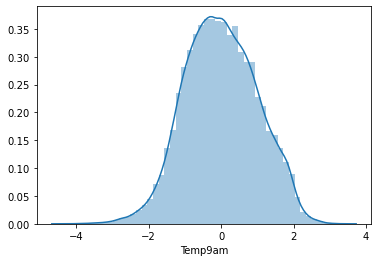

Variable name : Temp3pm


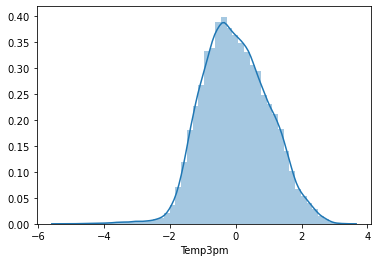

In [41]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

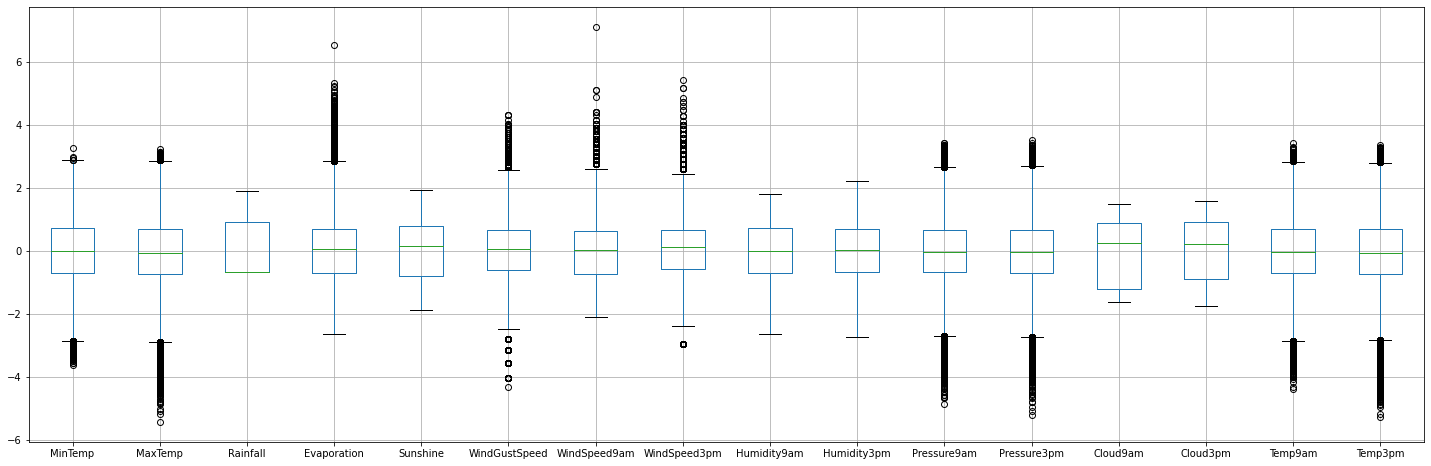

In [42]:
# Check for presence of outliers for transformed data
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()


# Null value imputation

In [43]:
# Check for null values
null_count = df1_pt_.isnull().sum()
per_null = df1_pt_.isnull().sum() / df1_pt_.shape[0] * 100

pd.DataFrame(data=[null_count,per_null], index=['Null_count', 'Null_percentage']).T

,Null_count,Null_percentage
MinTemp,1485.0,1.020899
MaxTemp,1261.0,0.866905
Rainfall,3261.0,2.241853
Evaporation,62790.0,43.166506
Sunshine,69835.0,48.009762
WindGustSpeed,10263.0,7.055548
WindSpeed9am,1767.0,1.214767
WindSpeed3pm,3062.0,2.105046
Humidity9am,2654.0,1.824557
Humidity3pm,4507.0,3.098446


* Null values are imputed using Iterative imputer method.

In [44]:
# Removing null values in RainTomorrow
df1_pt_.dropna(subset=['RainTomorrow'], inplace=True)

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lir = LinearRegression()

In [46]:
it = IterativeImputer(estimator=lir)
df2 = pd.DataFrame(it.fit_transform(df1_pt_), columns=df1_pt_.columns)

In [47]:
# Five point summary before imputation
df1_pt_.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,-0.001203,1.000724,-3.608361,-0.703490,-0.014300,0.722847,3.274365
MaxTemp,141871.0,0.000824,0.999457,-5.431554,-0.730688,-0.056974,0.712092,3.246149
Rainfall,140787.0,-0.001865,0.998914,-0.677825,-0.677825,-0.677825,0.931519,1.918434
Evaporation,81350.0,0.000549,1.000104,-2.646708,-0.710630,0.076891,0.715273,6.530548
Sunshine,74377.0,0.003611,0.999024,-1.884991,-0.765666,0.198005,0.793776,1.951148
WindGustSpeed,132923.0,-0.003746,0.999719,-4.325745,-0.611034,0.049187,0.679064,4.322080
WindSpeed9am,140845.0,-0.004405,0.998938,-2.083207,-0.721108,0.022414,0.638300,7.126660
WindSpeed3pm,139563.0,-0.002800,0.999617,-2.948537,-0.581774,0.130647,0.660740,5.439784
Humidity9am,140419.0,-0.001834,1.000911,-2.637668,-0.693705,-0.010401,0.736827,1.801713
Humidity3pm,138583.0,-0.002727,1.000226,-2.731523,-0.678928,0.047906,0.703717,2.233733


In [48]:
# Five point summary after imputation
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,142193.0,-0.000966,0.999793,-3.608361,-0.703490,-0.014300,0.722847,3.274365
MaxTemp,142193.0,0.000997,0.998901,-5.431554,-0.730688,-0.056974,0.712092,3.246149
Rainfall,142193.0,-0.000501,0.994729,-0.855733,-0.677825,-0.677825,0.720430,1.918434
Evaporation,142193.0,-0.096745,0.928285,-3.441426,-0.710630,-0.087697,0.540399,6.530548
Sunshine,142193.0,-0.041741,0.914676,-3.285786,-0.709726,0.035111,0.674601,2.525900
WindGustSpeed,142193.0,-0.022117,0.995408,-4.325745,-0.639903,-0.065584,0.679064,4.322080
WindSpeed9am,142193.0,-0.008037,0.996404,-2.328038,-0.721108,0.022414,0.638300,7.126660
WindSpeed3pm,142193.0,-0.004554,0.993578,-2.948537,-0.581774,0.126489,0.660740,5.439784
Humidity9am,142193.0,0.002500,1.000138,-2.731566,-0.693705,-0.010401,0.736827,2.746529
Humidity3pm,142193.0,0.000201,0.997895,-2.731523,-0.678928,0.047906,0.703717,3.189208


* After imputation, variation in the data is very minute or less.
* Hence Imputation using Linear regression algorithm is found to be satisfactory.

In [49]:
# Null value for final modified dataset
df2.isnull().sum().sum()

0

In [50]:
df2.to_csv('EDA_Final_df2.csv')

In [51]:
df2.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day
0,0.202047,-0.014924,0.720430,0.175456,-0.125408,0.411254,0.732851,0.660740,0.044886,-1.442451,...,0.044818,2.0,13.0,13.0,14.0,0.0,0.0,2008.0,12.0,1.0
1,-0.735221,0.290361,-0.677825,0.250695,0.982539,0.411254,-1.184328,0.454282,-1.306010,-1.285844,...,0.399401,2.0,14.0,6.0,15.0,0.0,0.0,2008.0,12.0,2.0
2,0.124920,0.372724,-0.677825,0.904105,1.191871,0.547369,0.638300,0.860721,-1.562048,-1.029549,...,0.244185,2.0,15.0,13.0,15.0,0.0,0.0,2008.0,12.0,3.0


### Statistical Test

In [52]:
df2.drop(['RainToday','Year','Month','Day'],axis = 1,inplace = True)

In [53]:
# Categorical Vs Categorical


# HO: Variables have no relation with the target variable (Rain Tomorrow)
# HA: Variables have relation with the target variable (Rain Tomorrow)

from scipy.stats import chi2_contingency
scol =[]
spval =[]
ss=[]
for n in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n],df['RainTomorrow']))[1]
    spval.append(cp)
    if cp<0.05:
        ss.append('Significant')
    else:
        ss.append('Insignificant')
pd.DataFrame({'Feature':scol,'p-value':spval,'Significance':ss})

,Feature,p-value,Significance
0,Location,0.000000e+00,Significant
1,WindGustDir,0.000000e+00,Significant
2,WindDir9am,0.000000e+00,Significant
3,WindDir3pm,5.876710e-276,Significant


In [54]:
# From the above results it can be seen that the P-Value is less than 5% for all the features, so we reject H0 and accept HA.
# i.e. all the categorical features have some relation with the target variable (Rain Tomorrow).

In [55]:
from scipy import stats
from scipy.stats import shapiro

### Test For Normality

In [56]:
df2.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainTomorrow'],
      dtype='object')

In [57]:
cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

In [58]:
df2_0 = df2[df2['RainTomorrow']==0]
df2_1 = df2[df2['RainTomorrow']==1]

In [59]:
p0_val = []
p1_val = []
ss = []
for n in cols:
    p0_val.append(stats.shapiro(df2_0[n])[1])
    p1_val.append(stats.shapiro(df2_1[n])[1])
    


pd.DataFrame(data = [p0_val,p1_val],columns = cols,index = ['p0_val','p1_val']).T

,p0_val,p1_val
MinTemp,4.024011e-40,1.235160e-37
MaxTemp,0.000000e+00,9.668959e-44
Rainfall,0.000000e+00,0.000000e+00
Evaporation,3.891406e-42,1.977031e-21
Sunshine,0.000000e+00,0.000000e+00
WindSpeed9am,0.000000e+00,3.643376e-44
WindSpeed3pm,0.000000e+00,5.177504e-34
Humidity9am,0.000000e+00,0.000000e+00
Humidity3pm,0.000000e+00,0.000000e+00
Pressure9am,1.121039e-44,1.772556e-28


In [60]:
from scipy.stats import mannwhitneyu

In [61]:
# HO: Variables have no relation with the target variable (Rain Tomorrow)
# HA: Variables have relation with the target variable (Rain Tomorrow)

In [62]:
s0_man = []

for n in cols:
    s0_man.append(stats.mannwhitneyu(df2_0[n],df2_1[n]))
pd.DataFrame(data = (s0_man),index = cols)

,statistic,pvalue
MinTemp,1.571926e+09,1.506724e-183
MaxTemp,1.371555e+09,0.000000e+00
Rainfall,1.058438e+09,0.000000e+00
Evaporation,1.390389e+09,0.000000e+00
Sunshine,6.099516e+08,0.000000e+00
WindSpeed9am,1.560981e+09,2.325220e-206
WindSpeed3pm,1.573896e+09,1.740897e-180
Humidity9am,1.105089e+09,0.000000e+00
Humidity3pm,7.027839e+08,0.000000e+00
Pressure9am,1.200300e+09,0.000000e+00


### Considering Target Variable

In [63]:
y = df2['RainTomorrow']
x = df2.drop('RainTomorrow',axis = 1)

In [64]:
y.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [65]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm
0,0.202047,-0.014924,0.720430,0.175456,-0.125408,0.411254,0.732851,0.660740,0.044886,-1.442451,-1.387317,-1.156712,1.185478,0.237324,0.002831,0.044818,2.0,13.0,13.0,14.0
1,-0.735221,0.290361,-0.677825,0.250695,0.982539,0.411254,-1.184328,0.454282,-1.306010,-1.285844,-0.993182,-1.058826,-0.830931,-0.643818,0.048771,0.399401,2.0,14.0,6.0,15.0
2,0.124920,0.372724,-0.677825,0.904105,1.191871,0.547369,0.638300,0.860721,-1.562048,-1.029549,-1.400822,-0.932763,-0.825424,-0.899105,0.625395,0.244185,2.0,15.0,13.0,15.0
3,-0.451034,0.685160,-0.677825,0.290638,1.054043,-1.303879,-0.206919,-1.127145,-1.261634,-1.763600,-0.021847,-0.355469,-1.076678,-0.899374,0.186205,0.706327,2.0,4.0,9.0,0.0
4,0.829353,1.256589,1.088626,0.225031,-0.321051,0.198008,-0.721108,0.240546,0.677207,-0.878220,-0.965823,-1.310242,0.879473,1.249018,0.140457,1.145172,2.0,13.0,1.0,7.0


In [66]:
x.shape

(142193, 20)

### Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (99535, 20)
x_test: (42658, 20)
y_train: (99535,)
y_test: (42658,)


### Model Building 

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,roc_auc_score,f1_score,precision_score,recall_score

 ### Logistic Regression (Base Model)

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
y_prob_test = lr.predict_proba(x_test)[:,1]
y_prob_train = lr.predict_proba(x_train)[:,1]

In [70]:
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_train,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     33139
         1.0       0.73      0.56      0.64      9519

    accuracy                           0.86     42658
   macro avg       0.81      0.75      0.77     42658
weighted avg       0.85      0.86      0.85     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     77177
         1.0       0.74      0.56      0.64     22358

    accuracy                           0.86     99535
   macro avg       0.81      0.75      0.78     99535
weighted avg       0.85      0.86      0.85     99535

accuracy_score for test: 0.8557363214402925
accuracy_score for train: 0.8573165218264932
roc_auc_score for test: 0.8891754814590493


In [71]:
lr = pd.DataFrame({'accracy_score': [accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_train,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_train,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_train,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_train,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
lr

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.857317,0.890852,0.639945,0.564496,0.738675
Test,0.855736,0.889175,0.635037,0.562454,0.729130


In [72]:
confusion_matrix(y_test,y_pred_test)

array([[31150,  1989],
       [ 4165,  5354]], dtype=int64)

### Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_test = dtc.predict(x_test)
y_pred_train = dtc.predict(x_train)
y_prob_test = dtc.predict_proba(x_test)[:,1]
y_prob_train = dtc.predict_proba(x_train)[:,1]

In [74]:
confusion_matrix(y_test,y_pred_test)

array([[29337,  3802],
       [ 3587,  5932]], dtype=int64)

In [75]:
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_train,y_pred_train))

classification_report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     33139
         1.0       0.61      0.62      0.62      9519

    accuracy                           0.83     42658
   macro avg       0.75      0.75      0.75     42658
weighted avg       0.83      0.83      0.83     42658

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77177
         1.0       1.00      1.00      1.00     22358

    accuracy                           1.00     99535
   macro avg       1.00      1.00      1.00     99535
weighted avg       1.00      1.00      1.00     99535



In [76]:
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_train,y_pred_train))

accuracy_score for test: 0.8267851282291715
accuracy_score for train: 1.0


In [77]:
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

roc_auc_score for test: 0.7542229169585313


In [78]:
dtc = pd.DataFrame({'accracy_score': [accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_train,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_train,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_train,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_train,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
dtc

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,1.000000,1.000000,1.000000,1.000000,1.00000
Test,0.826785,0.754223,0.616216,0.623175,0.60941


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_test = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
y_prob_test = rfc.predict_proba(x_test)[:,1]
y_prob_train = rfc.predict_proba(x_train)[:,1]

In [80]:
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_train,y_pred_train))

classification_report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     33139
         1.0       0.82      0.62      0.71      9519

    accuracy                           0.88     42658
   macro avg       0.86      0.79      0.82     42658
weighted avg       0.88      0.88      0.88     42658

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77177
         1.0       1.00      1.00      1.00     22358

    accuracy                           1.00     99535
   macro avg       1.00      1.00      1.00     99535
weighted avg       1.00      1.00      1.00     99535



In [81]:
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_train,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

accuracy_score for test: 0.8847812836982512
accuracy_score for train: 0.9999799065655297
roc_auc_score for test: 0.9257983324217312


In [82]:
rf = pd.DataFrame({'accracy_score': [accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_train,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_train,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_train,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_train,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
rf

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.999980,1.000000,0.999955,0.999911,1.000000
Test,0.884781,0.925798,0.705389,0.618132,0.821329


### KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
y_prob_test = knn.predict_proba(x_test)[:,1]
y_prob_train = knn.predict_proba(x_train)[:,1]

In [84]:
print(confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_train,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_train,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

[[31022  2117]
 [ 4767  4752]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     33139
         1.0       0.69      0.50      0.58      9519

    accuracy                           0.84     42658
   macro avg       0.78      0.72      0.74     42658
weighted avg       0.83      0.84      0.83     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     77177
         1.0       0.82      0.61      0.70     22358

    accuracy                           0.88     99535
   macro avg       0.86      0.79      0.81     99535
weighted avg       0.88      0.88      0.88     99535

accuracy_score for test: 0.8386234703924235
accuracy_score for train: 0.8824835485005275
roc_auc_score for test: 0.8311045516381621


In [85]:
knn = pd.DataFrame({'accracy_score': [accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_train,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_train,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_train,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_train,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
knn

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.882484,0.939492,0.699422,0.608686,0.821948
Test,0.838623,0.831105,0.579937,0.499212,0.691804


### Hyperparameter Tuning 

In [86]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=4)
params = {'n_estimators': sp_randint(50,150),
          'max_features': sp_randint(1,20),
          'min_samples_leaf': sp_randint(1, 10),
          'max_depth': sp_randint(1, 10),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, cv=3, n_iter=10, scoring='roc_auc',
               random_state=4, n_jobs=-1)

rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207086F8F10>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207086ECDC0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020708895940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207082E5460>},
                   random_state=4, scoring='roc_auc')

In [88]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 9,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [89]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)
rfc.fit(x_train, y_train)

y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:,1]

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_train_pred))
print('Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_pred_test = rfc.predict(x_test)
y_prob_test = rfc.predict_proba(x_test)[:,1]

print('\n')
print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_pred_test))
print('Accuracy - Test: ', accuracy_score(y_test, y_pred_test))
print('AUC - Test: ', roc_auc_score(y_test, y_prob_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_train,y_pred_train))

Confusion Matrix - Train:  
 [[74240  2937]
 [ 9802 12556]]
Accuracy - Train:  0.872014869141508
AUC - Train:  0.9159998937968596


Confusion Matrix - Test:  
 [[31694  1445]
 [ 4297  5222]]
Accuracy - Test:  0.8653945332645694
AUC - Test:  0.9029781793630582
classification_report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     33139
         1.0       0.78      0.55      0.65      9519

    accuracy                           0.87     42658
   macro avg       0.83      0.75      0.78     42658
weighted avg       0.86      0.87      0.86     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     77177
         1.0       0.82      0.61      0.70     22358

    accuracy                           0.88     99535
   macro avg       0.86      0.79      0.81     99535
weighted avg       0.88      0.88      0.88     99535



In [90]:
rf = pd.DataFrame({'accracy_score': [accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_train,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_train,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_train,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_train,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
rf

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.882484,0.939492,0.699422,0.608686,0.821948
Test,0.865395,0.902978,0.645249,0.548587,0.783261


### Models

### Logit method 

In [91]:
import statsmodels.api as sm
xc = sm.add_constant(x)

model = sm.Logit(y, xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.329459
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               142193
Model:                          Logit   Df Residuals:                   142172
Method:                           MLE   Df Model:                           20
Date:                Tue, 04 May 2021   Pseudo R-squ.:                  0.3809
Time:                        19:10:22   Log-Likelihood:                -46847.
converged:                       True   LL-Null:                       -75668.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2183      0.029    -77.193      0.000      -2.275      -2.162
MinTemp          -0.4758      0.030    -15.979      0.000      -0.534      -0.417
MaxTemp           0.2659      0.054      4.967      0.000       0.161       0.371
Rainfall          0.3441      0.009     36.580      0.000       0.326       0.363
Evaporation       0.1569      0.017      9.194      0.000       0.123       0.190
Sunshine         -1.5476      0.023    -68.408      0.000      -1.592      -1.503
WindGustSpeed     0.7339      0.014     51.862      0.000       0.706       0.762
WindSpeed9am     -0.1214      0.012    -10.328      0.000      -0.144      -0.098
WindSpeed3pm     -0.1132      0.012     -9.379      0.000      -0.137      -0.090
Humidity9am       0.0226      0.018      1.260      0.208      -0.013       0.058
Humidity3pm       1.0396      0.022     48.210      0.000       0.997       1.082
Pressure9am       1.0959      0.041     26.891      0.000       1.016       1.176
Pressure3pm      -1.4972      0.040    -37.456      0.000      -1.576      -1.419
Cloud9am         -0.4297      0.018    -24.505      0.000      -0.464      -0.395
Cloud3pm          0.0432      0.018      2.351      0.019       0.007       0.079
Temp9am           0.2750      0.044      6.282      0.000       0.189       0.361
Temp3pm           0.2333      0.057      4.070      0.000       0.121       0.346
Location         -0.0024      0.001     -3.916      0.000      -0.004      -0.001
WindGustDir       0.0198      0.002      9.123      0.000       0.016       0.024
WindDir9am       -0.0006      0.002     -0.289      0.772      -0.005       0.003
WindDir3pm        0.0148      0.002      6.390      0.000       0.010       0.019
=================================================================================
"""

In [92]:
cols = list(xc.columns)

while (len(cols)>0):
    x1 = xc[cols]
    model = sm.Logit(y, x1).fit()
    p = model.pvalues
    p = p.drop('const')
    p_max = p.max()
    p_max_feature = p.idxmax()
    if (p_max>0.05):
        cols.remove(p_max_feature)
        print('removed:',p_max_feature, 'Prob:',p_max)
    else:
        break
selected_cols = cols
print(selected_cols)

Optimization terminated successfully.
         Current function value: 0.329459
         Iterations 7
removed: WindDir9am Prob: 0.7724790270738872
Optimization terminated successfully.
         Current function value: 0.329459
         Iterations 7
removed: Humidity9am Prob: 0.2060017188911929
Optimization terminated successfully.
         Current function value: 0.329465
         Iterations 7
['const', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir3pm']


In [93]:
selected_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir3pm']

In [94]:
x = df2[selected_features]

In [95]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location,WindGustDir,WindDir3pm
0,0.202047,-0.014924,0.720430,0.175456,-0.125408,0.411254,0.732851,0.660740,-1.442451,-1.387317,-1.156712,1.185478,0.237324,0.002831,0.044818,2.0,13.0,14.0
1,-0.735221,0.290361,-0.677825,0.250695,0.982539,0.411254,-1.184328,0.454282,-1.285844,-0.993182,-1.058826,-0.830931,-0.643818,0.048771,0.399401,2.0,14.0,15.0
2,0.124920,0.372724,-0.677825,0.904105,1.191871,0.547369,0.638300,0.860721,-1.029549,-1.400822,-0.932763,-0.825424,-0.899105,0.625395,0.244185,2.0,15.0,15.0
3,-0.451034,0.685160,-0.677825,0.290638,1.054043,-1.303879,-0.206919,-1.127145,-1.763600,-0.021847,-0.355469,-1.076678,-0.899374,0.186205,0.706327,2.0,4.0,0.0
4,0.829353,1.256589,1.088626,0.225031,-0.321051,0.198008,-0.721108,0.240546,-0.878220,-0.965823,-1.310242,0.879473,1.249018,0.140457,1.145172,2.0,13.0,7.0


In [96]:
y = df2['RainTomorrow']

In [97]:
y.value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

### Train Test Split 

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (99535, 18)
x_test: (42658, 18)
y_train: (99535,)
y_test: (42658,)


## With SMOTE 

### SMOTE

As our Target variable having imbalance to make it balance we should do SMOTE method.

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=1)
x_trains, y_trains = sm.fit_resample(x_train, y_train)

In [101]:
y_trains.value_counts()

1.0    77177
0.0    77177
Name: RainTomorrow, dtype: int64

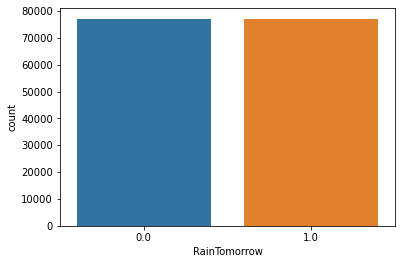

In [102]:
sns.countplot(y_trains)
plt.show()

### Logistic Regression 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,roc_auc_score,f1_score,precision_score,recall_score

In [104]:
lr = LogisticRegression()
lr.fit(x_trains,y_trains)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_trains)
y_prob_test = lr.predict_proba(x_test)[:,1]
y_prob_train = lr.predict_proba(x_trains)[:,1]

In [105]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))

confusion_matrix
 [[27077  6062]
 [ 1910  7609]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.93      0.82      0.87     33139
         1.0       0.56      0.80      0.66      9519

    accuracy                           0.81     42658
   macro avg       0.75      0.81      0.76     42658
weighted avg       0.85      0.81      0.82     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     77177
         1.0       0.82      0.81      0.82     77177

    accuracy                           0.82    154354
   macro avg       0.82      0.82      0.82    154354
weighted avg       0.82      0.82      0.82    154354

accuracy_score for test: 0.8131182896525857
accuracy_score for train: 0.8162081967425528
roc_auc_score for test: 0.8894139819072073
confusion_matrix
 [[27077  6062]
 [ 1910  7609]]


In [106]:
lr = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
lr

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.816208,0.898317,0.815598,0.812898,0.818316
Test,0.813118,0.889414,0.656231,0.799349,0.556580


   ### Decision Tree 

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtc = DecisionTreeClassifier()
dtc.fit(x_trains,y_trains)
y_pred_test = dtc.predict(x_test)
y_pred_train = dtc.predict(x_trains)
y_prob_test = dtc.predict_proba(x_test)[:,1]
y_prob_train = dtc.predict_proba(x_trains)[:,1]

In [109]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))

confusion_matrix
 [[28144  4995]
 [ 3027  6492]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.88     33139
         1.0       0.57      0.68      0.62      9519

    accuracy                           0.81     42658
   macro avg       0.73      0.77      0.75     42658
weighted avg       0.83      0.81      0.82     42658

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77177
         1.0       1.00      1.00      1.00     77177

    accuracy                           1.00    154354
   macro avg       1.00      1.00      1.00    154354
weighted avg       1.00      1.00      1.00    154354

accuracy_score for test: 0.8119461765671152
accuracy_score for train: 1.0
roc_auc_score for test: 0.7656378318119058
confusion_matrix
 [[28144  4995]
 [ 3027  6492]]


In [110]:
dtc = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
dtc

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,1.000000,1.000000,1.000000,1.000000,1.000000
Test,0.811946,0.765638,0.618109,0.682004,0.565161


### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_trains,y_trains)
y_pred_test = rfc.predict(x_test)
y_pred_train = rfc.predict(x_trains)
y_prob_test = rfc.predict_proba(x_test)[:,1]
y_prob_train = rfc.predict_proba(x_trains)[:,1]

In [112]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))

confusion_matrix
 [[30331  2808]
 [ 2351  7168]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     33139
         1.0       0.72      0.75      0.74      9519

    accuracy                           0.88     42658
   macro avg       0.82      0.83      0.83     42658
weighted avg       0.88      0.88      0.88     42658

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     77177
         1.0       1.00      1.00      1.00     77177

    accuracy                           1.00    154354
   macro avg       1.00      1.00      1.00    154354
weighted avg       1.00      1.00      1.00    154354

accuracy_score for test: 0.8790613718411552
accuracy_score for train: 0.9999935213859051
roc_auc_score for test: 0.9270157546070016
confusion_matrix
 [[30331  2808]
 [ 2351  7168]]


In [113]:
rfc = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
rfc

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.999994,1.000000,0.999994,0.999987,1.000000
Test,0.879061,0.927016,0.735368,0.753020,0.718524


### KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_trains,y_trains)
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_trains)
y_prob_test = knn.predict_proba(x_test)[:,1]
y_prob_train = knn.predict_proba(x_trains)[:,1]

In [115]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

confusion_matrix
 [[25795  7344]
 [ 2179  7340]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.92      0.78      0.84     33139
         1.0       0.50      0.77      0.61      9519

    accuracy                           0.78     42658
   macro avg       0.71      0.77      0.73     42658
weighted avg       0.83      0.78      0.79     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     77177
         1.0       0.86      0.99      0.92     77177

    accuracy                           0.91    154354
   macro avg       0.92      0.91      0.91    154354
weighted avg       0.92      0.91      0.91    154354

accuracy_score for test: 0.7767593417412912
accuracy_score for train: 0.9143915933503505
roc_auc_score for test: 0.8377679168639205


In [116]:
knn = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
knn

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.914392,0.989583,0.920213,0.987354,0.861622
Test,0.776759,0.837768,0.606536,0.771089,0.499864


### ADA Boost

In [117]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
ada = AdaBoostClassifier()
ada.fit(x_trains,y_trains)
y_pred_test = ada.predict(x_test)
y_pred_train = ada.predict(x_trains)
y_prob_test = ada.predict_proba(x_test)[:,1]
y_prob_train = ada.predict_proba(x_trains)[:,1]

In [119]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

confusion_matrix
 [[27664  5475]
 [ 2310  7209]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.88     33139
         1.0       0.57      0.76      0.65      9519

    accuracy                           0.82     42658
   macro avg       0.75      0.80      0.76     42658
weighted avg       0.84      0.82      0.83     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83     77177
         1.0       0.83      0.83      0.83     77177

    accuracy                           0.83    154354
   macro avg       0.83      0.83      0.83    154354
weighted avg       0.83      0.83      0.83    154354

accuracy_score for test: 0.8175019925922453
accuracy_score for train: 0.8308045142983013
roc_auc_score for test: 0.8801812090488177


In [120]:
ada = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
ada

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.830805,0.912939,0.829876,0.825350,0.834453
Test,0.817502,0.880181,0.649372,0.757327,0.568354


### Gradiant Boosting

In [121]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb

In [122]:
gb = GradientBoostingClassifier()
gb.fit(x_trains,y_trains)
y_pred_test = gb.predict(x_test)
y_pred_train = gb.predict(x_trains)
y_prob_test = gb.predict_proba(x_test)[:,1]
y_prob_train = gb.predict_proba(x_trains)[:,1]

In [123]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

confusion_matrix
 [[28680  4459]
 [ 2475  7044]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     33139
         1.0       0.61      0.74      0.67      9519

    accuracy                           0.84     42658
   macro avg       0.77      0.80      0.78     42658
weighted avg       0.85      0.84      0.84     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     77177
         1.0       0.87      0.86      0.87     77177

    accuracy                           0.87    154354
   macro avg       0.87      0.87      0.87    154354
weighted avg       0.87      0.87      0.87    154354

accuracy_score for test: 0.837451357306953
accuracy_score for train: 0.8659574743770813
roc_auc_score for test: 0.8942368312334975


In [124]:
gb = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
gb

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.865957,0.943378,0.865662,0.863755,0.867577
Test,0.837451,0.894237,0.670155,0.739994,0.612362


### Light GBM 

In [125]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_trains,y_trains)
y_pred_test = lgbm.predict(x_test)
y_pred_train = lgbm.predict(x_trains)
y_prob_test = lgbm.predict_proba(x_test)[:,1]
y_prob_train = lgbm.predict_proba(x_trains)[:,1]

In [126]:
print('confusion_matrix\n',confusion_matrix(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))
print('accuracy_score for test:',accuracy_score(y_test,y_pred_test))
print('accuracy_score for train:',accuracy_score(y_trains,y_pred_train))
print('roc_auc_score for test:',roc_auc_score(y_test,y_prob_test))

confusion_matrix
 [[30780  2359]
 [ 3016  6503]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     33139
         1.0       0.73      0.68      0.71      9519

    accuracy                           0.87     42658
   macro avg       0.82      0.81      0.81     42658
weighted avg       0.87      0.87      0.87     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     77177
         1.0       0.93      0.90      0.92     77177

    accuracy                           0.92    154354
   macro avg       0.92      0.92      0.92    154354
weighted avg       0.92      0.92      0.92    154354

accuracy_score for test: 0.8739978433119228
accuracy_score for train: 0.9185573422133537
roc_auc_score for test: 0.9181510018725907


In [127]:
lgbm = pd.DataFrame({'accracy_score': [accuracy_score(y_trains,y_pred_train),accuracy_score(y_test,y_pred_test)],
                  'auc_score' : [roc_auc_score(y_trains,y_prob_train),roc_auc_score(y_test,y_prob_test)],
                    'f1_score' : [f1_score(y_trains,y_pred_train),f1_score(y_test,y_pred_test)],
                    'recall_score' : [recall_score(y_trains,y_pred_train),recall_score(y_test,y_pred_test)],
                    'precision_score' : [precision_score(y_trains,y_pred_train),precision_score(y_test,y_pred_test)],
                    },index = ('Train','Test'))
lgbm

,accracy_score,auc_score,f1_score,recall_score,precision_score
Train,0.918557,0.976051,0.917325,0.90365,0.931420
Test,0.873998,0.918151,0.707578,0.68316,0.733807


In [128]:
dict1 = {
'model' : ['Logistic', 'Decision Tree', 'Random forest', 'KNN', 
        'ADA Boost', 'Gradient Boosting','Light GBM'],
'Accuracy_score' : [0.814, 0.810, 0.880, 0.764, 0.816, 0.837,0.875],
'ROC_AOC_score' : [0.889, 0.766, 0.926, 0.826, 0.879, 0.894,0.918],
'Recall_score' : [0.797, 0.687, 0.752, 0.753, 0.757, 0.743,0.687],
'Precision_score' : [0.560, 0.561, 0.714, 0.481, 0.566, 0.612,0.736],
'F1_score' : [0.657, 0.66, 0.618, 0.733, 0.647, 0.671,0.711]
}

pd.DataFrame(dict1)

,model,Accuracy_score,ROC_AOC_score,Recall_score,Precision_score,F1_score
0,Logistic,0.814,0.889,0.797,0.560,0.657
1,Decision Tree,0.810,0.766,0.687,0.561,0.660
2,Random forest,0.880,0.926,0.752,0.714,0.618
3,KNN,0.764,0.826,0.753,0.481,0.733
4,ADA Boost,0.816,0.879,0.757,0.566,0.647
5,Gradient Boosting,0.837,0.894,0.743,0.612,0.671
6,Light GBM,0.875,0.918,0.687,0.736,0.711


### Hyperparamter Tuning

#### Random Forest 

In [129]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=4)
params = {'n_estimators': sp_randint(50,150),
          'max_features': sp_randint(1,20),
          'min_samples_leaf': sp_randint(1, 10),
          'max_depth': sp_randint(1, 10),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, cv=3, n_iter=10, scoring='roc_auc',
               random_state=4, n_jobs=-1)

rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020708F2E970>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020709056D00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020709056B80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020708FDB4F0>},
                   random_state=4, scoring='roc_auc')

In [131]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 9,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [132]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)
rfc.fit(x_trains, y_trains)

y_train_pred = rfc.predict(x_trains)
y_train_prob = rfc.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_trains, y_train_pred))
print('Accuracy - Train: ', accuracy_score(y_trains, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_trains, y_train_prob))

y_pred_test = rfc.predict(x_test)
y_prob_test = rfc.predict_proba(x_test)[:,1]

print('\n')
print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_pred_test))
print('Accuracy - Test: ', accuracy_score(y_test, y_pred_test))
print('AUC - Test: ', roc_auc_score(y_test, y_prob_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))

Confusion Matrix - Train:  
 [[65425 11752]
 [10546 66631]]
Accuracy - Train:  0.8555398629125257
AUC - Train:  0.933949267191483


Confusion Matrix - Test:  
 [[27840  5299]
 [ 2014  7505]]
Accuracy - Test:  0.8285667401190867
AUC - Test:  0.9005894516306463
classification_report:
               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88     33139
         1.0       0.59      0.79      0.67      9519

    accuracy                           0.83     42658
   macro avg       0.76      0.81      0.78     42658
weighted avg       0.86      0.83      0.84     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     77177
         1.0       0.93      0.90      0.92     77177

    accuracy                           0.92    154354
   macro avg       0.92      0.92      0.92    154354
weighted avg       0.92      0.92      0.92    154354



In [136]:
print('precision_score:',precision_score(y_test,y_pred_test))
print('f1_score:',f1_score(y_test,y_pred_test))
print('recall_score:',recall_score(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_test,y_prob_test))

precision_score: 0.5861449547016557
f1_score: 0.6724006629933252
recall_score: 0.7884231536926147
roc_auc_score: 0.9005894516306463


In [137]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(50,150),
          'max_features': sp_randint(1, 10),
          'max_depth': sp_randint(3, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, cv=3, n_iter=10, scoring='roc_auc',
               random_state=4, n_jobs=-1)

rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207220E6A30>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020721AC3250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020721ABDBB0>},
                   random_state=4, scoring='roc_auc')

In [138]:
rsearch.best_params_

{'criterion': 'gini', 'max_depth': 17, 'max_features': 8, 'n_estimators': 119}

In [139]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)
rfc.fit(x_trains, y_trains)

y_train_pred = rfc.predict(x_trains)
y_train_prob = rfc.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_trains, y_train_pred))
print('Accuracy - Train: ', accuracy_score(y_trains, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_trains, y_train_prob))

y_pred_test = rfc.predict(x_test)
y_prob_test = rfc.predict_proba(x_test)[:,1]

print('\n')
print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_pred_test))
print('Accuracy - Test: ', accuracy_score(y_test, y_pred_test))
print('AUC - Test: ', roc_auc_score(y_test, y_prob_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))

Confusion Matrix - Train:  
 [[75869  1308]
 [  534 76643]]
Accuracy - Train:  0.9880663928372443
AUC - Train:  0.9993034406539321


Confusion Matrix - Test:  
 [[29988  3151]
 [ 2168  7351]]
Accuracy - Test:  0.8753106099676496
AUC - Test:  0.9265235738157428
classification_report:
               precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     33139
         1.0       0.70      0.77      0.73      9519

    accuracy                           0.88     42658
   macro avg       0.82      0.84      0.83     42658
weighted avg       0.88      0.88      0.88     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     77177
         1.0       0.93      0.90      0.92     77177

    accuracy                           0.92    154354
   macro avg       0.92      0.92      0.92    154354
weighted avg       0.92      0.92      0.92    154354



In [140]:
print('precision_score:',precision_score(y_test,y_pred_test))
print('f1_score:',f1_score(y_test,y_pred_test))
print('recall_score:',recall_score(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_test,y_prob_test))

precision_score: 0.6999619120167587
f1_score: 0.7343289545976724
recall_score: 0.772244983716777
roc_auc_score: 0.9265235738157428


In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()
params = {'n_estimators': sp_randint(75,150),
          'max_features': sp_randint(2, 10),
          'max_depth': sp_randint(3, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(rfc, param_distributions=params, cv=3, n_iter=20, scoring='roc_auc',
               random_state=4, n_jobs=-1)

rsearch.fit(x, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207220EEFA0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207220FFA90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020721A9B310>},
                   random_state=4, scoring='roc_auc')

In [142]:
rsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'max_features': 7,
 'n_estimators': 111}

In [143]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state=4)
rfc.fit(x_trains, y_trains)

y_train_pred = rfc.predict(x_trains)
y_train_prob = rfc.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_trains, y_train_pred))
print('Accuracy - Train: ', accuracy_score(y_trains, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_trains, y_train_prob))

y_pred_test = rfc.predict(x_test)
y_prob_test = rfc.predict_proba(x_test)[:,1]

print('\n')
print('Confusion Matrix - Test: ', '\n', confusion_matrix(y_test, y_pred_test))
print('Accuracy - Test: ', accuracy_score(y_test, y_pred_test))
print('AUC - Test: ', roc_auc_score(y_test, y_prob_test))
print('classification_report:\n',classification_report(y_test,y_pred_test))
print('classification_report:\n',classification_report(y_trains,y_pred_train))

Confusion Matrix - Train:  
 [[77037   140]
 [   47 77130]]
Accuracy - Train:  0.9987884991642588
AUC - Train:  0.9999935164331571


Confusion Matrix - Test:  
 [[30167  2972]
 [ 2208  7311]]
Accuracy - Test:  0.8785690843452576
AUC - Test:  0.9297189646841844
classification_report:
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     33139
         1.0       0.71      0.77      0.74      9519

    accuracy                           0.88     42658
   macro avg       0.82      0.84      0.83     42658
weighted avg       0.88      0.88      0.88     42658

classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     77177
         1.0       0.93      0.90      0.92     77177

    accuracy                           0.92    154354
   macro avg       0.92      0.92      0.92    154354
weighted avg       0.92      0.92      0.92    154354



In [144]:
print('precision_score:',precision_score(y_test,y_pred_test))
print('f1_score:',f1_score(y_test,y_pred_test))
print('recall_score:',recall_score(y_test,y_pred_test))
print('roc_auc_score:',roc_auc_score(y_test,y_prob_test))

precision_score: 0.7109792862005251
f1_score: 0.7384102615897385
recall_score: 0.7680428616451308
roc_auc_score: 0.9297189646841844


### Light GBM

In [145]:
# Hyper parameter tuning for LightGBM
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint

lgbm1 = lgb.LGBMClassifier(random_state=1)
params = {'max_depth':sp_randint(1,10), 'learning_rate':sp_uniform(0.1,0.6), 'n_estimators':sp_randint(100,1000)}

rsearch = RandomizedSearchCV(estimator=lgbm1, param_distributions=params, n_iter=40, scoring='roc_auc', cv=3, n_jobs=-1, verbose=3)
rsearch.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020722139340>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020722139790>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000207221390A0>},
                   scoring='roc_auc', verbose=3)

In [146]:
best_params = rsearch.best_params_
best_params

{'learning_rate': 0.19940788622872344, 'max_depth': 9, 'n_estimators': 349}

In [165]:
lgbm1 = lgb.LGBMClassifier(**best_params)
lgbm1.fit(x_trains, y_trains)

y_test_pred = lgbm.predict(x_test)
y_test_prob = lgbm.predict_proba(x_test)[:,1]

# Check different metrics
print('Accuracy score is :', accuracy_score(y_test, y_test_pred))
print('ROC AUC score is :', roc_auc_score(y_test, y_test_prob))

print()
print('Confusion matrix is :')
print(confusion_matrix(y_test, y_test_pred))
print()
# Classification report for base model
print('Classification report is :')
print(classification_report(y_test, y_test_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy score is : 0.8969712597871443
ROC AUC score is : 0.9390350692536226

Confusion matrix is :
[[31465  1674]
 [ 2721  6798]]

Classification report is :
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     33139
         1.0       0.80      0.71      0.76      9519

    accuracy                           0.90     42658
   macro avg       0.86      0.83      0.85     42658
weighted avg       0.89      0.90      0.89     42658



In [166]:
print('precision_score:',precision_score(y_test,y_test_pred))
print('f1_score:',f1_score(y_test,y_test_pred))
print('recall_score:',recall_score(y_test,y_test_pred))
print('roc_auc_score:',roc_auc_score(y_test,y_test_prob))

precision_score: 0.8024079320113314
f1_score: 0.7557111889277972
recall_score: 0.7141506460762685
roc_auc_score: 0.9390350692536226


### kfold crossvalidation 

In [167]:
from sklearn.model_selection import cross_val_score

In [180]:
from sklearn.model_selection import train_test_split, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=10)
cv = cross_val_score(lgbm1, x, y, cv=kf)
cv

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

array([0.89901547, 0.89985935, 0.8916315 , 0.89696884, 0.90245446,
       0.90027428, 0.89865673, 0.8961249 , 0.899571  , 0.89499965])

In [181]:
cv.mean()

0.8979556191973479

In [182]:
cv.min()

0.8916315049226442

In [183]:
cv.max()

0.9024544623391237